# TRABAJO FINAL DE GRADO - PEC 2
###### Autor: Claudia Reina Fajardo
###### Octubre 2021

## Modelo de aprendizaje supervisado: Árbol de decisión

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from IPython.display import Image as PImage
from PIL import Image, ImageDraw, ImageFont
!pip install graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# cargamos el dataset
df = pd.read_csv('data.csv')

### Clases

Antes de empezar a construir modelos de aprendizaje, hay que definir cuales serán nuestras clases a modo de indicador de existencia o ausencia de problemas mentales.

Tenemos las siguientes categorías candidatas:

* depressed: que indica con qué frecuencia el participante se siente deprimido
* sleep: que indica con qué frecuencia el participante tienen problemas de insomnio
* yourself: que indica con qué frecuencia el participante siente problemas de aceptación (autoestima)
* dead: que indica con qué frecuencia el participante piensa en morir
* profMental: que indica si el participante ha necesitado ayuda profesional en temas de salud mental

Excepto en profMental, todas las demás indican grados, por lo que habría que unificar el etiquetado para cuando es que sí que existe el problema y para cuando es que no.

Todas tienen el siguiente patrón:

* 0.0 --> not_at_all
* 1.0 --> several
* 2.0 --> more_half
* 3.0 --> every_day
* 7.0 --> refused
* 9.0 --> dk (don't know)

Por lo que 0 es un claro no (que representaremos como 0) y las categorías 1, 2 y 3 sería un sí con distintos grados (que representaremos como 1).

Finalmente se pueden separar aquellas observaciones categorizadas como 7 y 9 para probar el modelo.

In [3]:
# cambios en depressed
df['depressed'] = df['depressed'].replace(2.0, 1.0)
df['depressed'] = df['depressed'].replace(3.0, 1.0)

# cambios en sleep
df['sleep'] = df['sleep'].replace(2.0, 1.0)
df['sleep'] = df['sleep'].replace(3.0, 1.0)

# cambios en yourself
df['yourself'] = df['yourself'].replace(2.0, 1.0)
df['yourself'] = df['yourself'].replace(3.0, 1.0)

# cambios en dead
df['dead'] = df['dead'].replace(2.0, 1.0)
df['dead'] = df['dead'].replace(3.0, 1.0)

# cambio en profMental
df['profMental'] = df['profMental'].replace(2.0, 0.0)

# guardamos los cambios para sucesivos usos
df.to_csv('data.csv', index=False)


Observaremos cómo estan repartidas las categorías.

In [4]:
# balance de depressed
df.groupby('depressed').size()

depressed
0.0    3780
1.0    1216
7.0       1
9.0       3
dtype: int64

In [5]:
# balance de sleep
df.groupby('sleep').size()

sleep
0.0    3164
1.0    1835
7.0       1
dtype: int64

In [6]:
# balance de yourself
df.groupby('yourself').size()

yourself
0.0    4129
1.0     869
9.0       2
dtype: int64

In [7]:
# balance de dead
df.groupby('dead').size()

dead
0.0    4829
1.0     169
7.0       1
9.0       1
dtype: int64

In [8]:
# balance de profMental
df.groupby('profMental').size()

profMental
0.0    4577
1.0     420
9.0       3
dtype: int64

Como vemos, todas las clases están desbalanceadas siendo mucha la diferencia que hay entre la categoría negativa y la positiva.

### Árbol de clasificación sobre depresión

Para crear un árbol de clasificación sobre la depresión seguiremos los siguientes pasos:
* Eliminar las observaciones que no estén dentro de la binaridad, ya que no aportan nada al modelo
* Eliminar todos los factores clasificatorios
* Comprobar la precisión entre las profundidades 1 y 4 (realmente a mayor profundidad mayor precisión, pero el árbol se hace más difícil de entender.
* Elegir la mejor precisión
* Mostrar el árbol
* Probar precisión con los demás factores clasificatorios, si es mejor que la anterior mostrar el árbol.

In [9]:
# Eliminación de elemenos clasificados como 7 y 9
data=df[df.depressed<2]

# Estudio de la profundidad con mejor precisión para la depresión
y_train = data['depressed']
x_train = data.drop(['depressed','sleep','yourself','dead','profMental'], axis=1).values 

# Probamos las precisiones con varias profundidades
for i in range(4):
    i+=1
    decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = i, criterion="entropy").fit(x_train, y_train)
    decision_tree.fit(x_train, y_train)
        
    print ("Precisión profundidad "+str(i)+" : "+str(round(decision_tree.score(x_train, y_train) * 100, 2))+" %")

Precisión profundidad 1 : 80.32 %
Precisión profundidad 2 : 81.63 %
Precisión profundidad 3 : 81.89 %
Precisión profundidad 4 : 82.95 %


In [10]:
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = 4, criterion="entropy").fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
        
print ("Precisión del árbol de clasificación: "+str(round(decision_tree.score(x_train, y_train) * 100, 2))+" %")

Precisión del árbol de clasificación: 82.95 %


In [11]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(decision_tree,
                           feature_names=df.drop(['depressed','sleep','yourself','dead','profMental'], axis=1).columns)

graph=graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

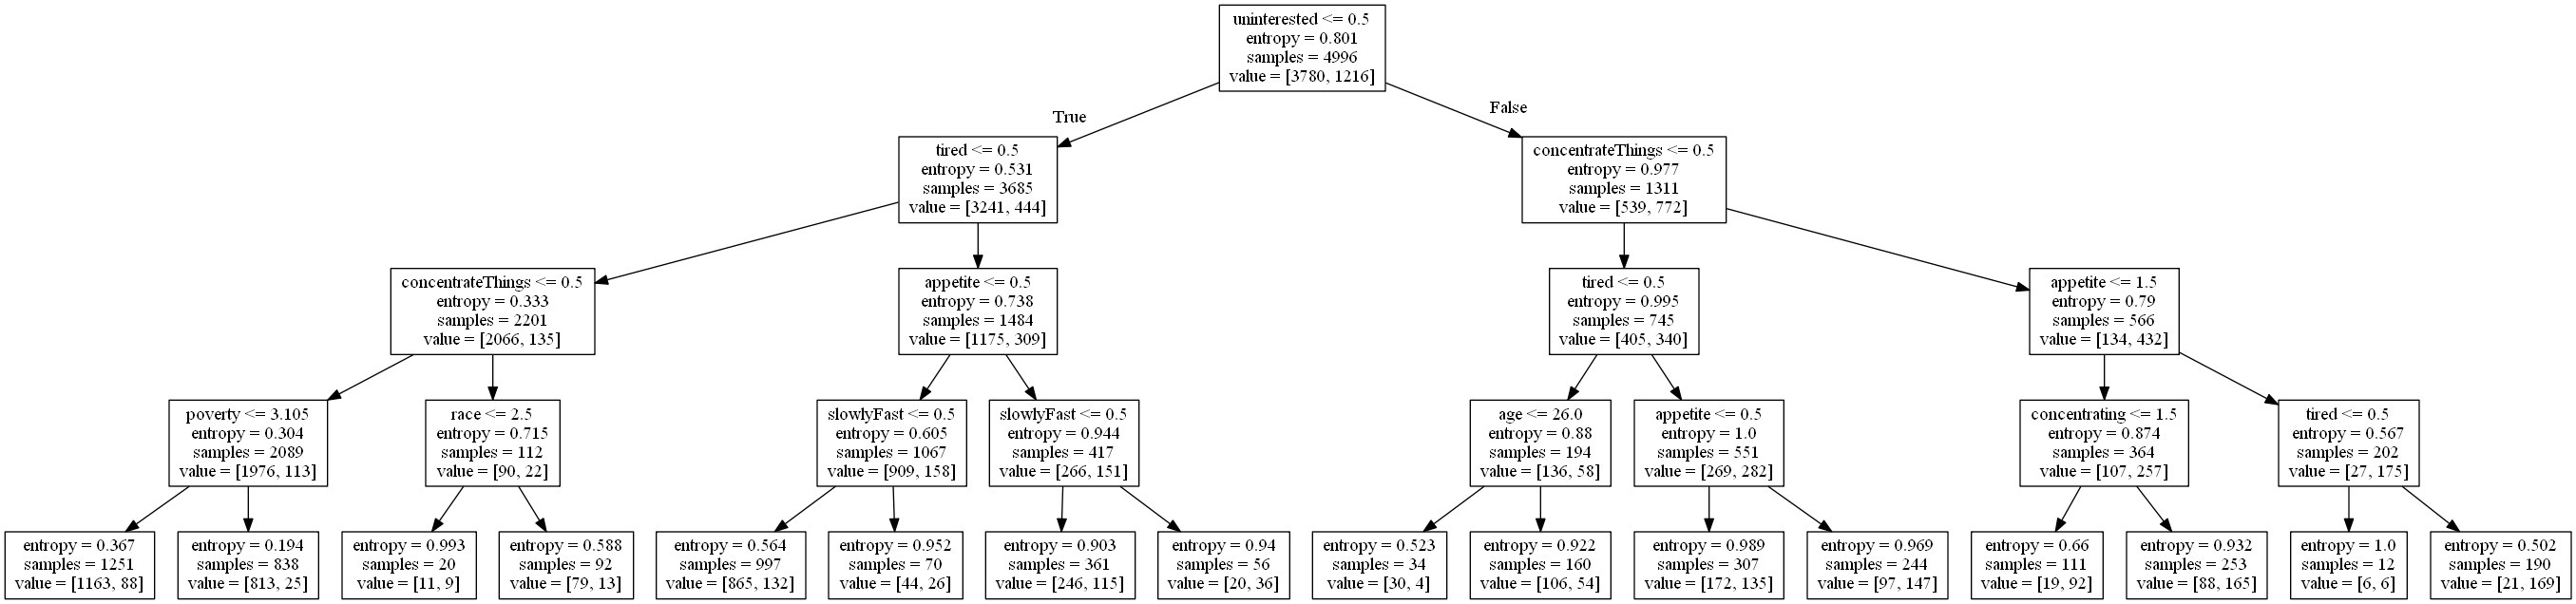

In [12]:
Image.open('tree.png','r')

In [13]:
y_train = data['depressed']
x_train = data.drop(['depressed'], axis=1).values 
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = 4, criterion="entropy").fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
        
print ("Precisión del árbol de clasificación: "+str(round(decision_tree.score(x_train, y_train) * 100, 2))+" %")

Precisión del árbol de clasificación: 85.47 %


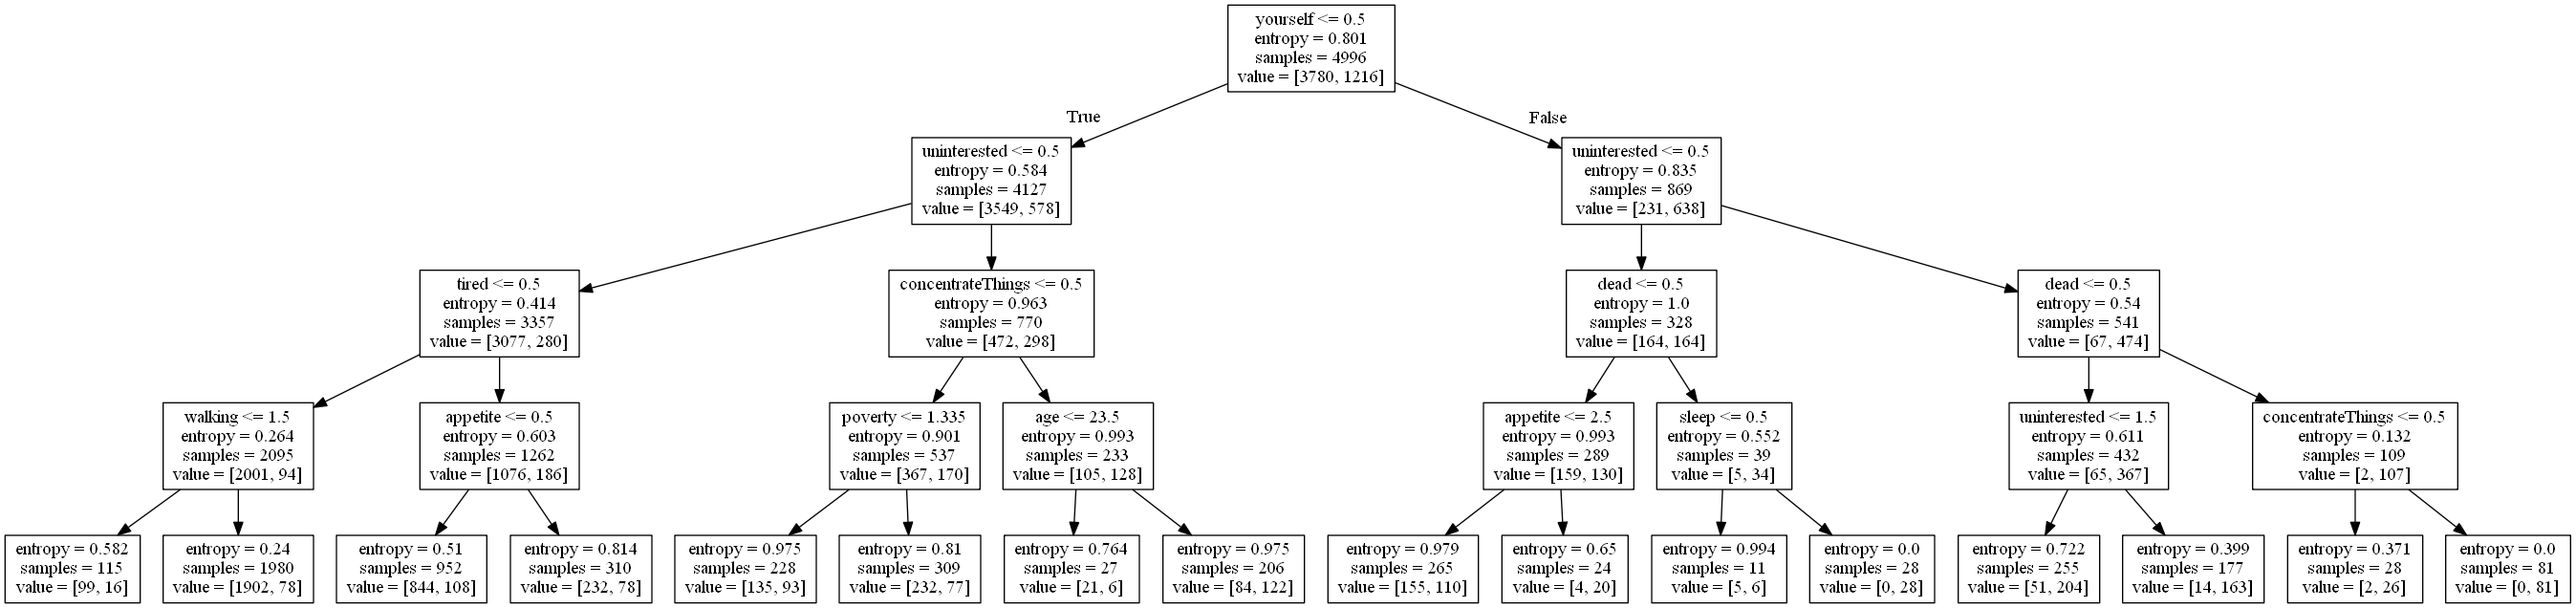

In [14]:
dot_data = export_graphviz(decision_tree,
                           feature_names=df.drop(['depressed'], axis=1).columns)

graph=graph_from_dot_data(dot_data)
graph.write_png('tree1.png')
Image.open('tree1.png','r')

### Árbol de clasificación sobre ideas de muerte

Repetimos el mismo proceso que hicimos con la depresión:

In [15]:
# Eliminación de elemenos clasificados como 7 y 9
data=df[df.dead<2]

# Estudio de la profundidad con mejor precisión para ideas de suicidio
y_train = data['dead']
x_train = data.drop(['depressed','sleep','yourself','dead','profMental'], axis=1).values 

# Probamos las precisiones con varias profundidades
for i in range(4):
    i+=1
    decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = i, criterion="entropy").fit(x_train, y_train)
    decision_tree.fit(x_train, y_train)
        
    print ("Precisión profundidad "+str(i)+" : "+str(round(decision_tree.score(x_train, y_train) * 100, 2))+" %")

Precisión profundidad 1 : 96.62 %
Precisión profundidad 2 : 96.62 %
Precisión profundidad 3 : 96.7 %
Precisión profundidad 4 : 96.7 %


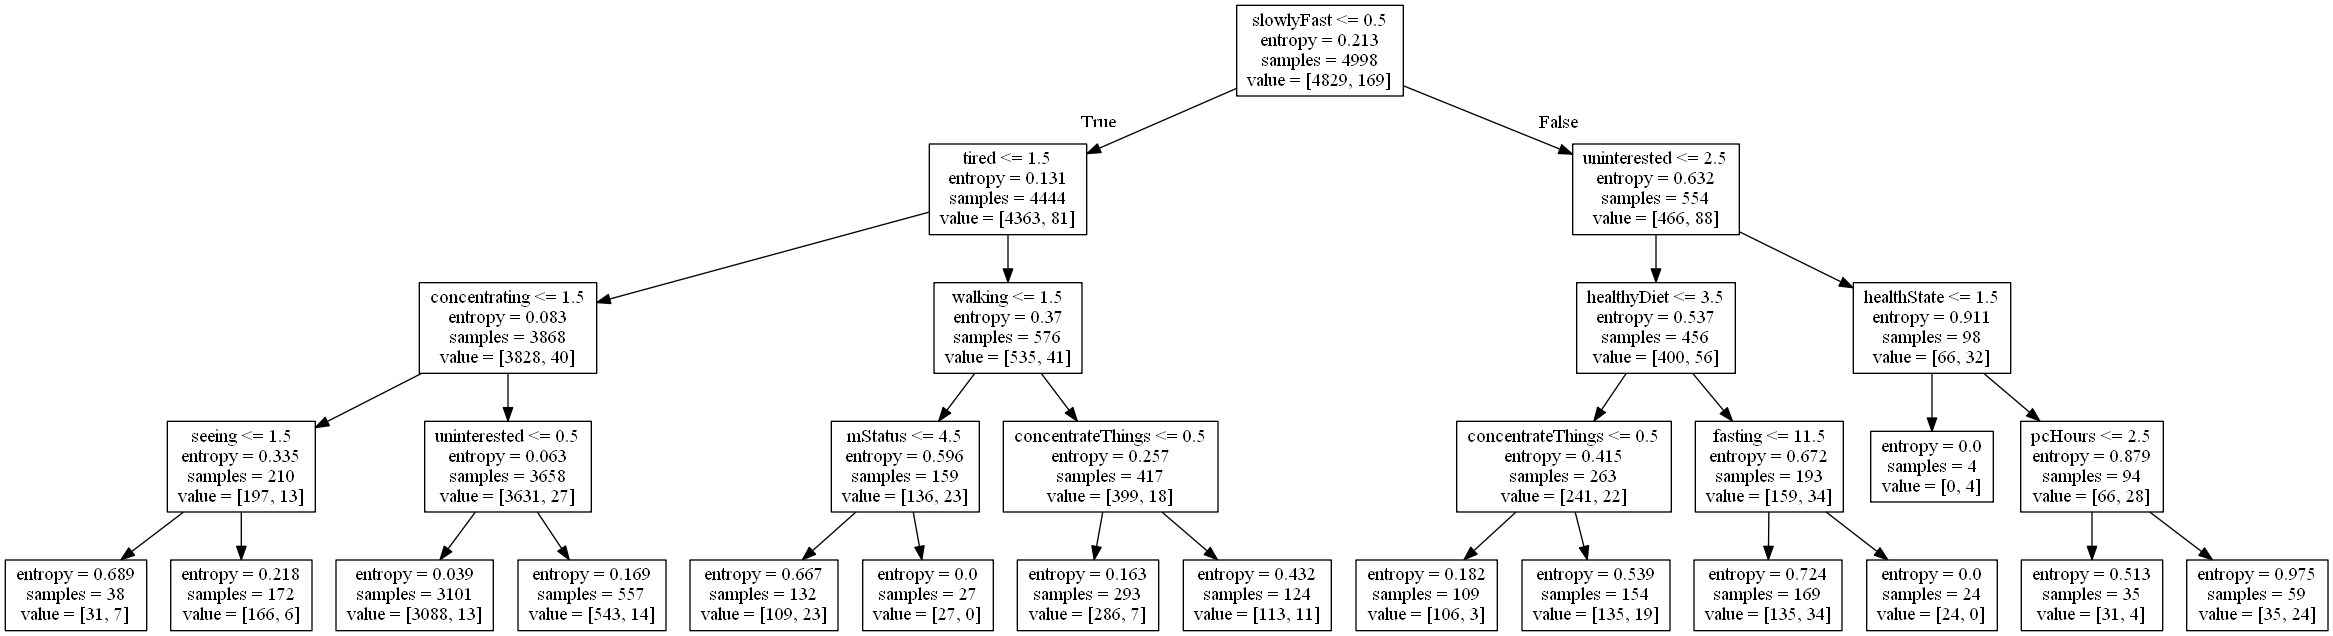

In [16]:
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = 4, criterion="entropy").fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
        
dot_data = export_graphviz(decision_tree,
                           feature_names=df.drop(['depressed','sleep','yourself','dead','profMental'], axis=1).columns)

graph=graph_from_dot_data(dot_data)
graph.write_png('tree_d.png')
Image.open('tree_d.png','r')

In [17]:
y_train = data['dead']
x_train = data.drop(['dead'], axis=1).values 
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = 4, criterion="entropy").fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
print ("Precisión del árbol de clasificación: "+str(round(decision_tree.score(x_train, y_train) * 100, 2))+" %")

Precisión del árbol de clasificación: 96.72 %


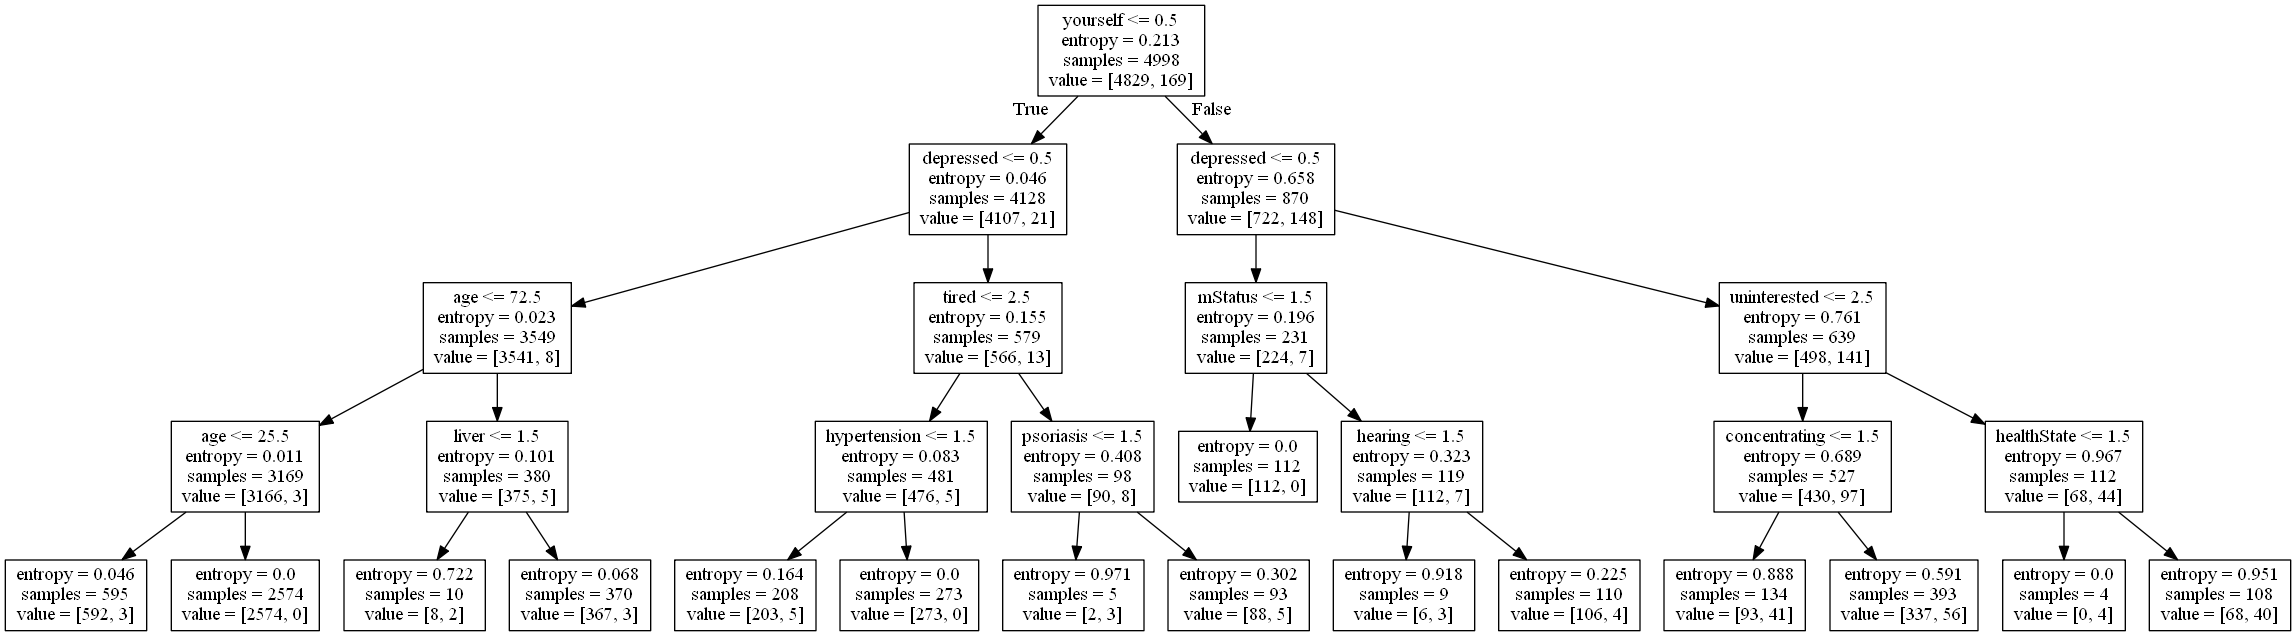

In [18]:
dot_data = export_graphviz(decision_tree,
                           feature_names=df.drop(['dead'], axis=1).columns)

graph=graph_from_dot_data(dot_data)
graph.write_png('tree_d1.png')
Image.open('tree_d1.png','r')

### Árbol de clasificación sobre insomnio

In [19]:
# Eliminación de elemenos clasificados como 7 y 9
data=df[df.sleep<2]

# Estudio de la profundidad con mejor precisión para el insomnio
y_train = data['sleep']
x_train = data.drop(['depressed','sleep','yourself','dead','profMental'], axis=1).values 

# Probamos las precisiones con varias profundidades
for i in range(4):
    i+=1
    decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = i, criterion="entropy").fit(x_train, y_train)
    decision_tree.fit(x_train, y_train)
        
    print ("Precisión profundidad "+str(i)+" : "+str(round(decision_tree.score(x_train, y_train) * 100, 2))+" %")

Precisión profundidad 1 : 69.43 %
Precisión profundidad 2 : 70.83 %
Precisión profundidad 3 : 73.49 %
Precisión profundidad 4 : 73.95 %


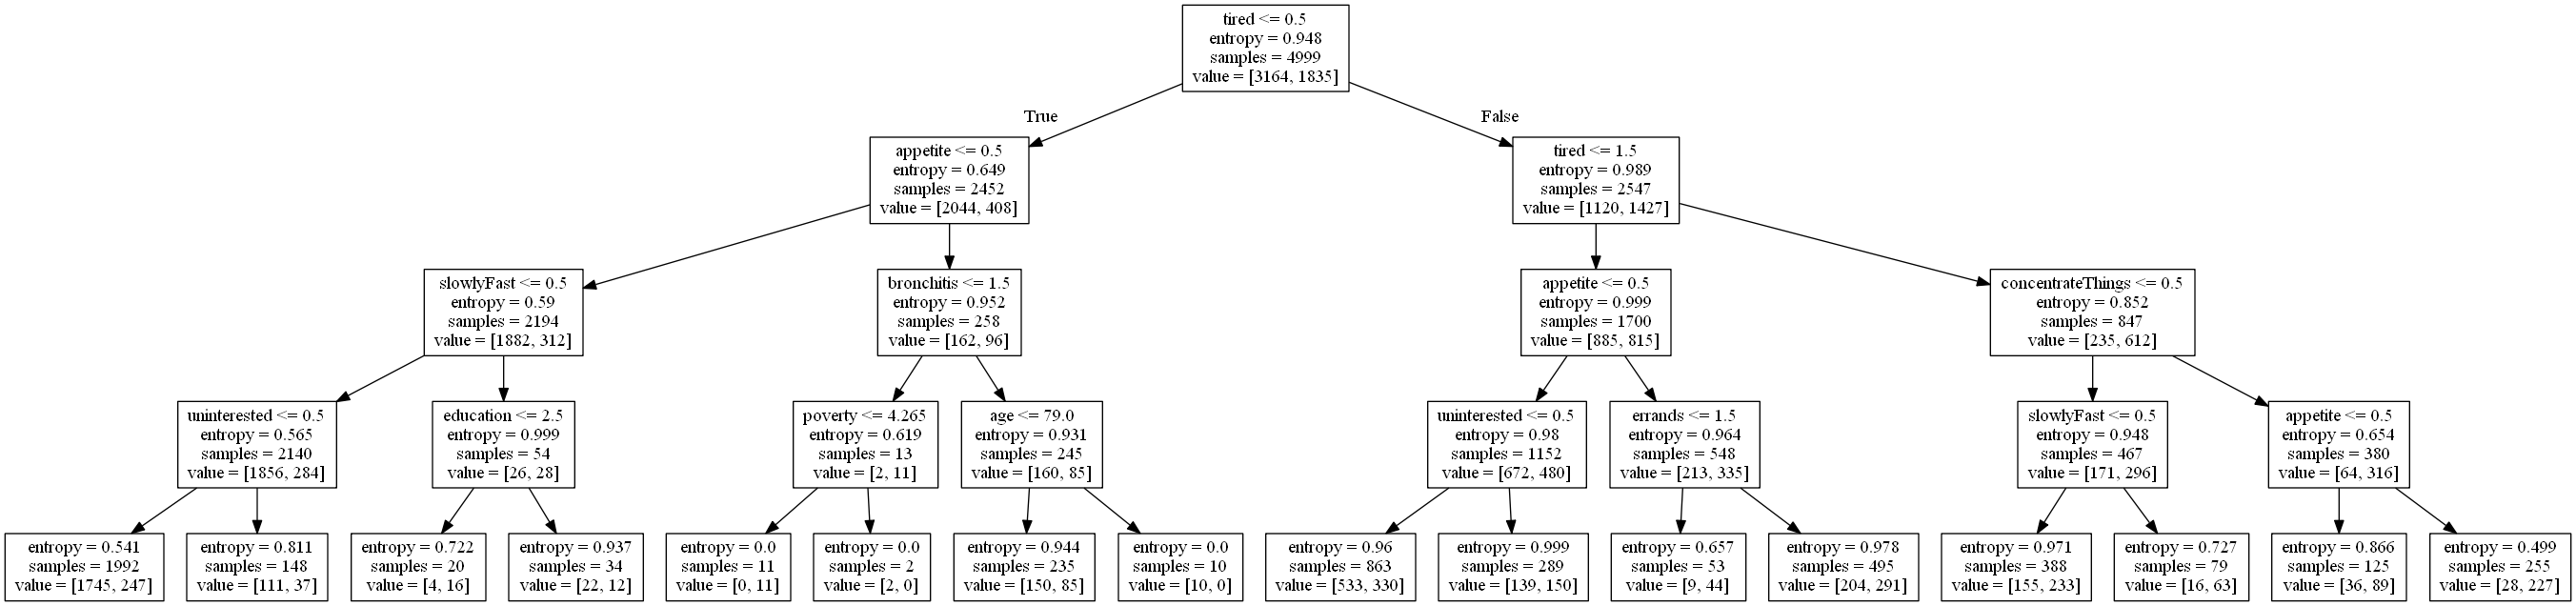

In [20]:
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = 4, criterion="entropy").fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
        
dot_data = export_graphviz(decision_tree,
                           feature_names=df.drop(['depressed','sleep','yourself','dead','profMental'], axis=1).columns)

graph=graph_from_dot_data(dot_data)
graph.write_png('tree_s.png')
Image.open('tree_s.png','r')

In [21]:
y_train = data['sleep']
x_train = data.drop(['sleep'], axis=1).values 
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = 4, criterion="entropy").fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
print ("Precisión del árbol de clasificación: "+str(round(decision_tree.score(x_train, y_train) * 100, 2))+" %")

Precisión del árbol de clasificación: 73.95 %


### Árbol de clasificación sobre problemas de autoestima

In [22]:
# Eliminación de elemenos clasificados como 7 y 9
data=df[df.yourself<2]

# Estudio de la profundidad con mejor precisión para autoestima
y_train = data['yourself']
x_train = data.drop(['depressed','sleep','yourself','dead','profMental'], axis=1).values 

# Probamos las precisiones con varias profundidades
for i in range(4):
    i+=1
    decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = i, criterion="entropy").fit(x_train, y_train)
    decision_tree.fit(x_train, y_train)
        
    print ("Precisión profundidad "+str(i)+" : "+str(round(decision_tree.score(x_train, y_train) * 100, 2))+" %")

Precisión profundidad 1 : 82.61 %
Precisión profundidad 2 : 84.59 %
Precisión profundidad 3 : 85.01 %
Precisión profundidad 4 : 85.93 %


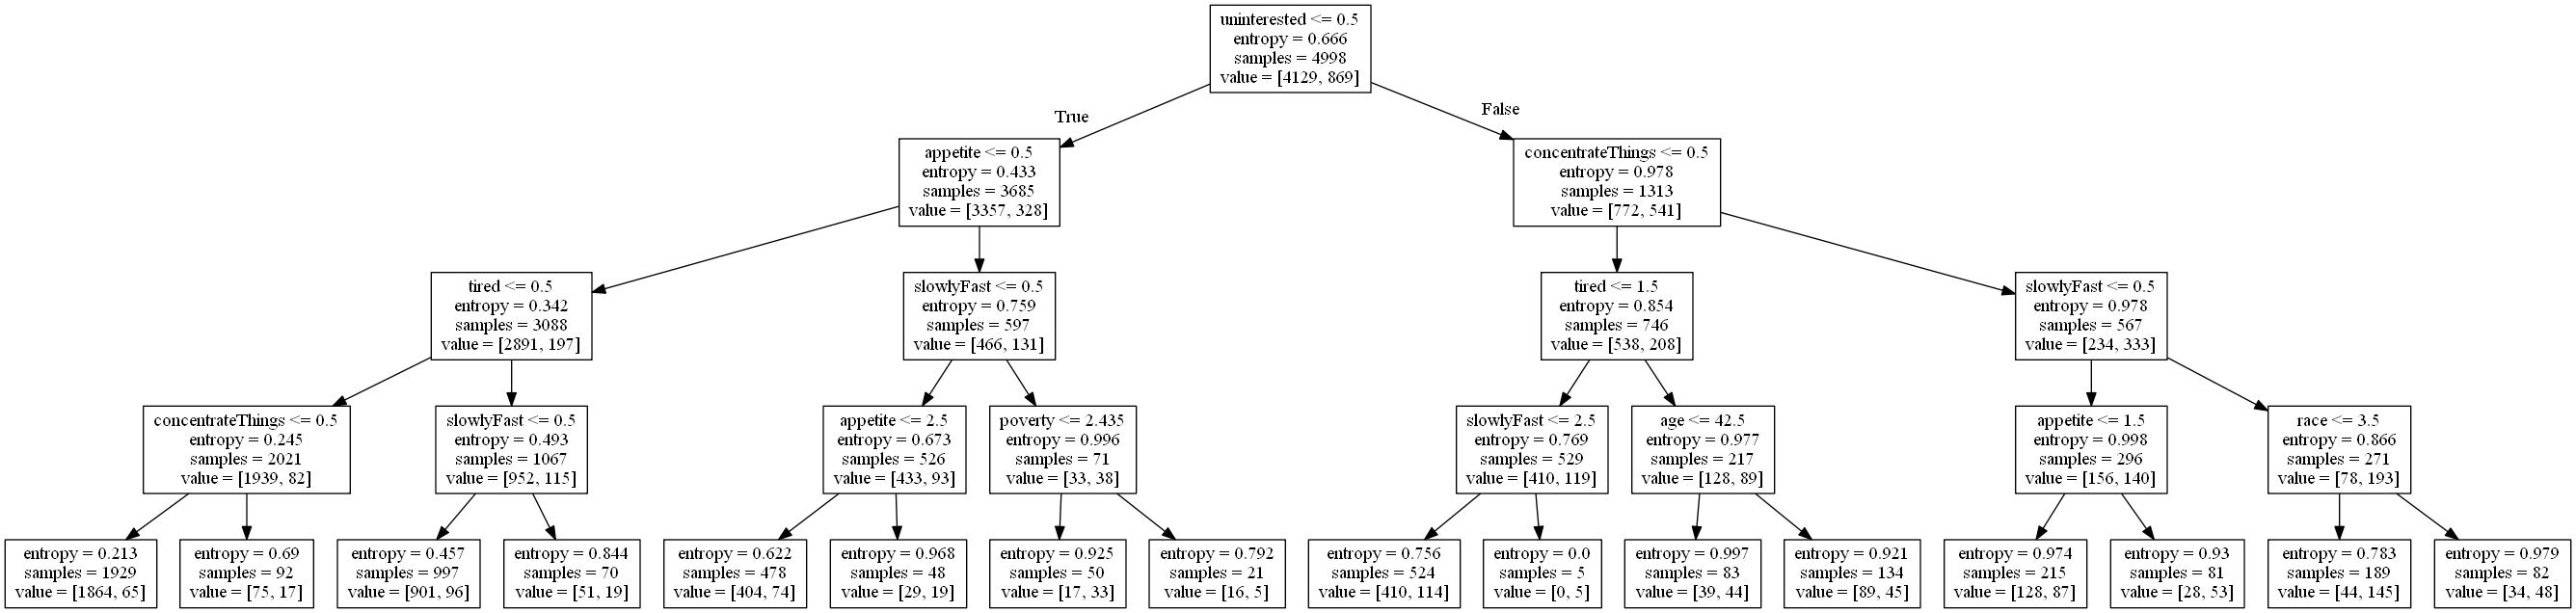

In [23]:
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = 4, criterion="entropy").fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
        
dot_data = export_graphviz(decision_tree,
                           feature_names=df.drop(['depressed','sleep','yourself','dead','profMental'], axis=1).columns)

graph=graph_from_dot_data(dot_data)
graph.write_png('tree_y.png')
Image.open('tree_y.png','r')

In [24]:
y_train = data['yourself']
x_train = data.drop(['yourself'], axis=1).values 
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = 4, criterion="entropy").fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
print ("Precisión del árbol de clasificación: "+str(round(decision_tree.score(x_train, y_train) * 100, 2))+" %")

Precisión del árbol de clasificación: 87.33 %


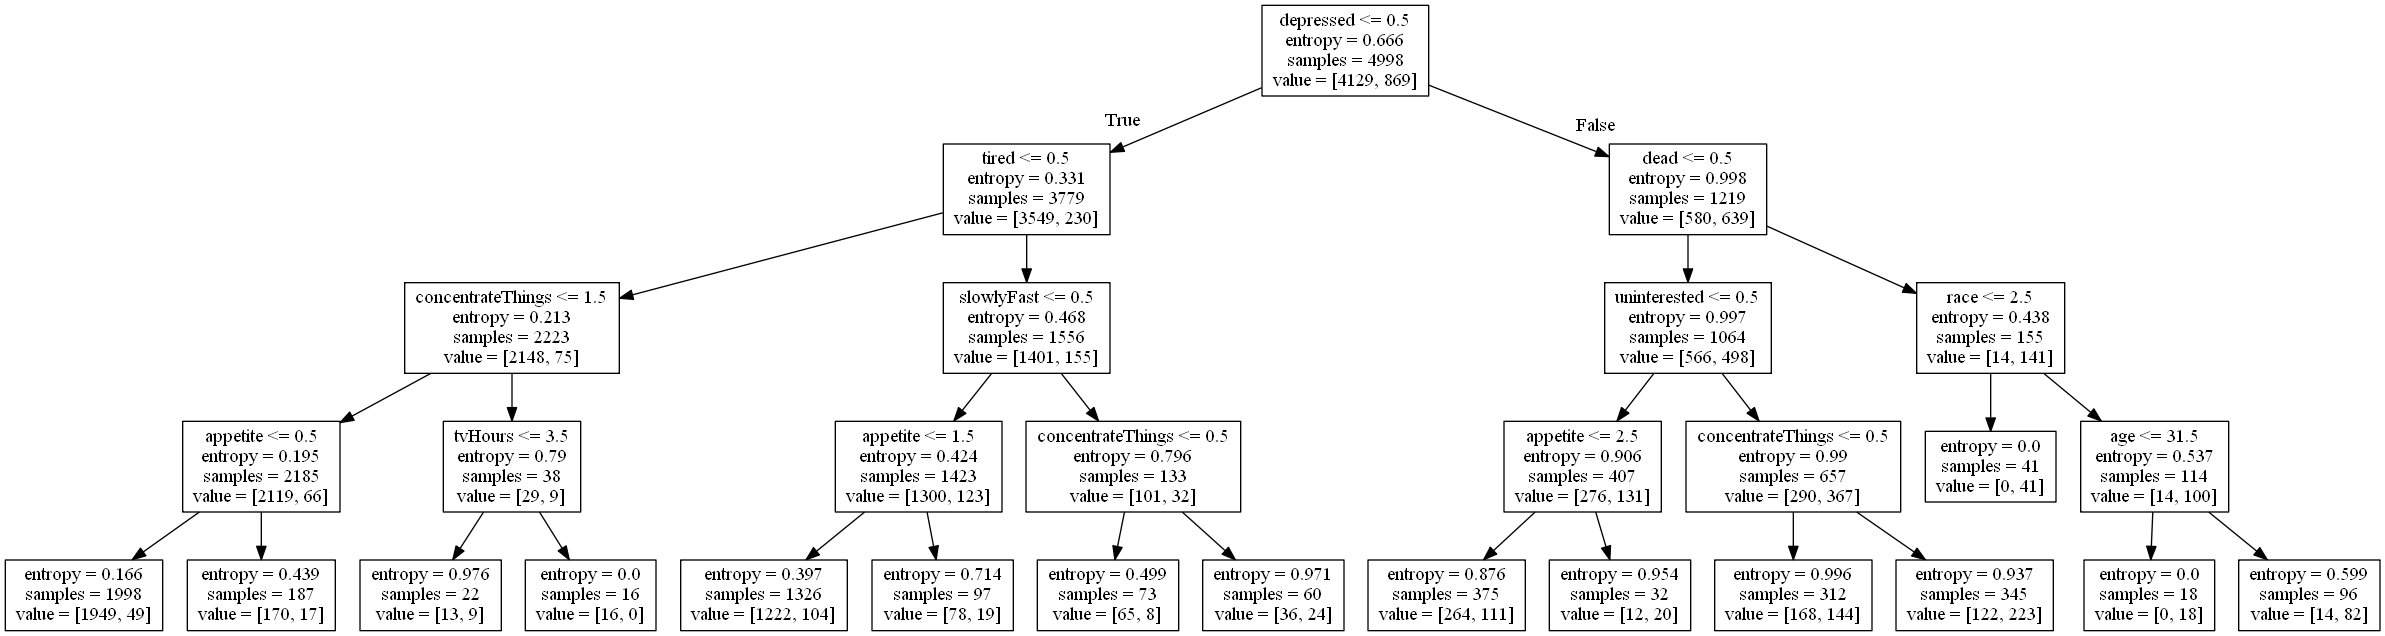

In [25]:
dot_data = export_graphviz(decision_tree,
                           feature_names=df.drop(['yourself'], axis=1).columns)

graph=graph_from_dot_data(dot_data)
graph.write_png('tree_y1.png')
Image.open('tree_y1.png','r')

### Árbol de clasificación sobre visitarse con un profesional de la salud mental

In [26]:
# Eliminación de elemenos clasificados como 7 y 9
data=df[df.profMental<2]

# Estudio de la profundidad con mejor precisión para autoestima
y_train = data['profMental']
x_train = data.drop(['depressed','sleep','yourself','dead','profMental'], axis=1).values 

# Probamos las precisiones con varias profundidades
for i in range(4):
    i+=1
    decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = i, criterion="entropy").fit(x_train, y_train)
    decision_tree.fit(x_train, y_train)
        
    print ("Precisión profundidad "+str(i)+" : "+str(round(decision_tree.score(x_train, y_train) * 100, 2))+" %")

Precisión profundidad 1 : 91.59 %
Precisión profundidad 2 : 91.72 %
Precisión profundidad 3 : 91.98 %
Precisión profundidad 4 : 92.0 %


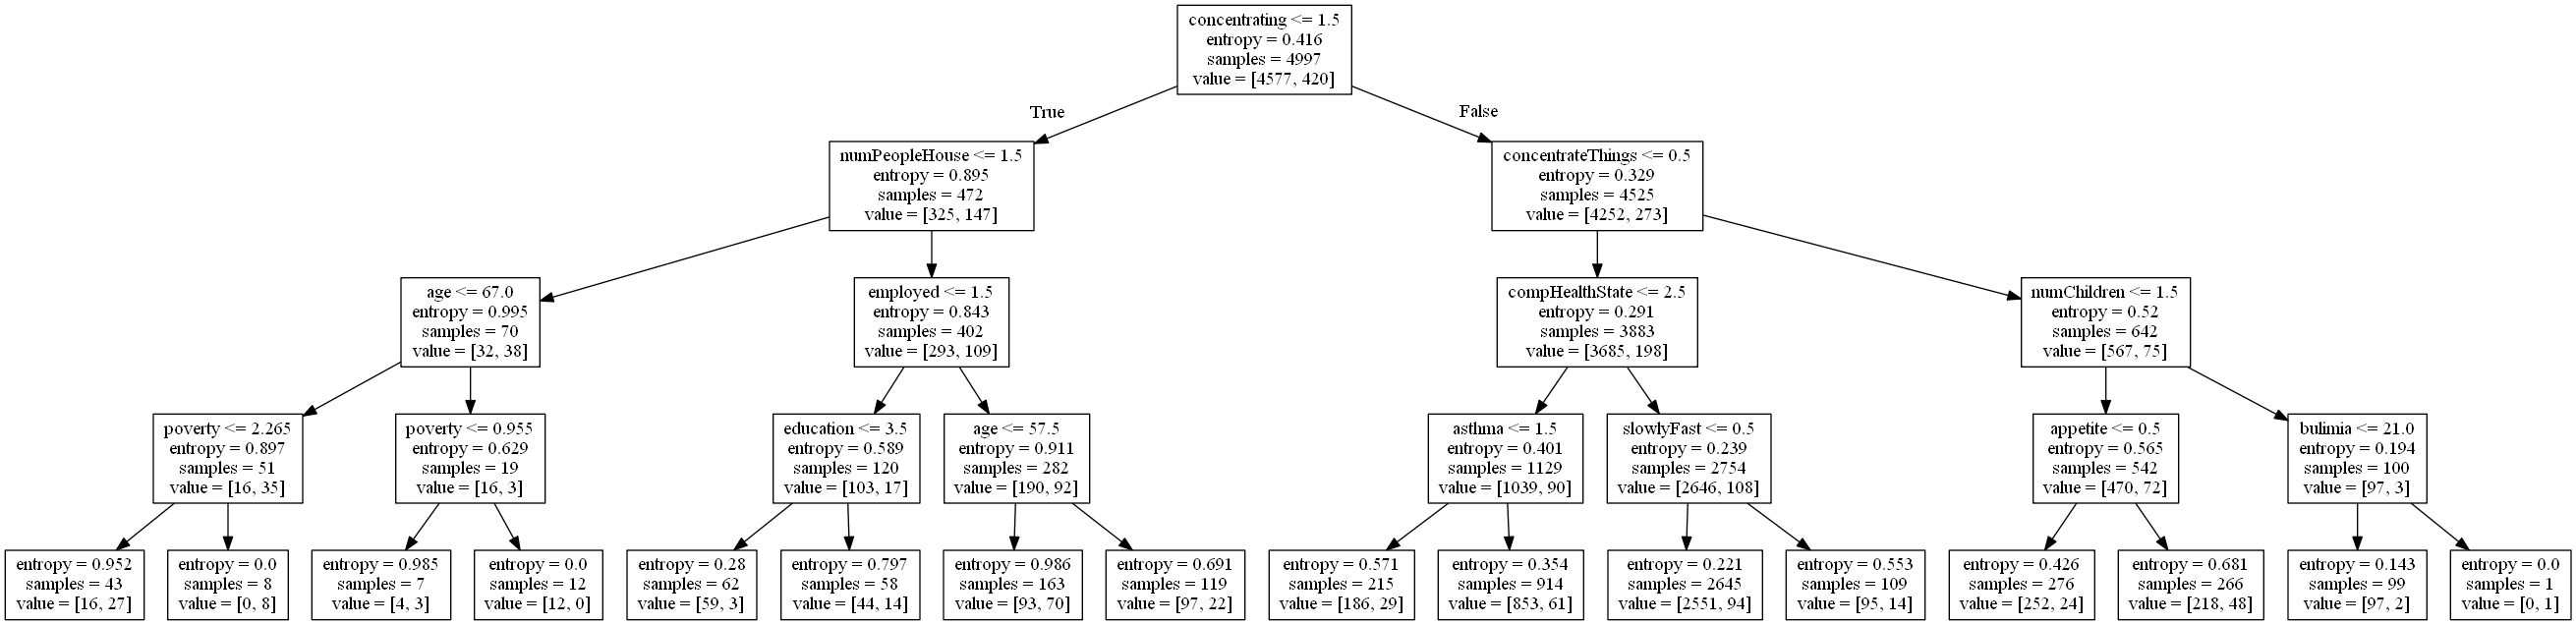

In [27]:
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = 4, criterion="entropy").fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
        
dot_data = export_graphviz(decision_tree,
                           feature_names=df.drop(['depressed','sleep','yourself','dead','profMental'], axis=1).columns)

graph=graph_from_dot_data(dot_data)
graph.write_png('tree_p.png')
Image.open('tree_p.png','r')

In [28]:
y_train = data['profMental']
x_train = data.drop(['profMental'], axis=1).values 
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth = 4, criterion="entropy").fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
print ("Precisión del árbol de clasificación: "+str(round(decision_tree.score(x_train, y_train) * 100, 2))+" %")

Precisión del árbol de clasificación: 91.98 %


## Modelo de aprendizaje supervisado: K-NN

### KNN sobre depresión

In [29]:
# plantamos semilla para que nos de el mismo resultado en las diferentes ejecuciones
np.random.seed(0)

# Eliminación de elemenos clasificados como 7 y 9
data=df[df.depressed<2]

# Separación de conjunto y clase para cálculo de resultados
X=data.drop(['depressed'], axis=1)
y=data.depressed.values

# abreviación para usar knn
knn = KNeighborsClassifier()
# rango de valores de vecinos que usaremos en el test
rango = {'n_neighbors': np.arange(1, 25)}
# probaremos cada knn para un cross-validation de 10
knn_gscv = GridSearchCV(knn, rango, cv=10)
# entrenamos el modelo
knn_gscv.fit(X, y)
# comprobamos qué cantidad de vecinos da mejor resultado
print("Número de vecinos con mejores resultados: "+str(knn_gscv.best_params_))
# vemos el porcentaje de aciertos que ha tenido
print("Mejor precisión obtenida: "+str(knn_gscv.best_score_))


Número de vecinos con mejores resultados: {'n_neighbors': 9}
Mejor precisión obtenida: 0.7914344689378758


### KNN sobre ideas de muerte

In [30]:
# plantamos semilla para que nos de el mismo resultado en las diferentes ejecuciones
np.random.seed(0)

# Eliminación de elemenos clasificados como 7 y 9
data=df[df.dead<2]

# Separación de conjunto y clase para cálculo de resultados
X=data.drop(['dead'], axis=1)
y=data.dead.values

# abreviación para usar knn
knn = KNeighborsClassifier()
# rango de valores de vecinos que usaremos en el test
rango = {'n_neighbors': np.arange(1, 25)}
# probaremos cada knn para un cross-validation de 10
knn_gscv = GridSearchCV(knn, rango, cv=10)
# entrenamos el modelo
knn_gscv.fit(X, y)
# comprobamos qué cantidad de vecinos da mejor resultado
print("Número de vecinos con mejores resultados: "+str(knn_gscv.best_params_))
# vemos el porcentaje de aciertos que ha tenido
print("Mejor precisión obtenida: "+str(knn_gscv.best_score_))

Número de vecinos con mejores resultados: {'n_neighbors': 2}
Mejor precisión obtenida: 0.9667867735470942


### KNN sobre insomnio

In [31]:
# plantamos semilla para que nos de el mismo resultado en las diferentes ejecuciones
np.random.seed(0)

# Eliminación de elemenos clasificados como 7 y 9
data=df[df.sleep<2]

# Separación de conjunto y clase para cálculo de resultados
X=data.drop(['sleep'], axis=1)
y=data.sleep.values

# abreviación para usar knn
knn = KNeighborsClassifier()
# rango de valores de vecinos que usaremos en el test
rango = {'n_neighbors': np.arange(1, 25)}
# probaremos cada knn para un cross-validation de 10
knn_gscv = GridSearchCV(knn, rango, cv=10)
# entrenamos el modelo
knn_gscv.fit(X, y)
# comprobamos qué cantidad de vecinos da mejor resultado
print("Número de vecinos con mejores resultados: "+str(knn_gscv.best_params_))
# vemos el porcentaje de aciertos que ha tenido
print("Mejor precisión obtenida: "+str(knn_gscv.best_score_))

Número de vecinos con mejores resultados: {'n_neighbors': 23}
Mejor precisión obtenida: 0.6785382765531063


### KNN sobre autoestima

In [32]:
# plantamos semilla para que nos de el mismo resultado en las diferentes ejecuciones
np.random.seed(0)

# Eliminación de elemenos clasificados como 7 y 9
data=df[df.yourself<2]

# Separación de conjunto y clase para cálculo de resultados
X=data.drop(['yourself'], axis=1)
y=data.yourself.values

# abreviación para usar knn
knn = KNeighborsClassifier()
# rango de valores de vecinos que usaremos en el test
rango = {'n_neighbors': np.arange(1, 25)}
# probaremos cada knn para un cross-validation de 10
knn_gscv = GridSearchCV(knn, rango, cv=10)
# entrenamos el modelo
knn_gscv.fit(X, y)
# comprobamos qué cantidad de vecinos da mejor resultado
print("Número de vecinos con mejores resultados: "+str(knn_gscv.best_params_))
# vemos el porcentaje de aciertos que ha tenido
print("Mejor precisión obtenida: "+str(knn_gscv.best_score_))

Número de vecinos con mejores resultados: {'n_neighbors': 9}
Mejor precisión obtenida: 0.8373366733466933


### KNN sobre visitas en salud mental

In [33]:
# plantamos semilla para que nos de el mismo resultado en las diferentes ejecuciones
np.random.seed(0)

# Eliminación de elemenos clasificados como 7 y 9
data=df[df.profMental<2]

# Separación de conjunto y clase para cálculo de resultados
X=data.drop(['profMental'], axis=1)
y=data.profMental.values

# abreviación para usar knn
knn = KNeighborsClassifier()
# rango de valores de vecinos que usaremos en el test
rango = {'n_neighbors': np.arange(1, 25)}
# probaremos cada knn para un cross-validation de 10
knn_gscv = GridSearchCV(knn, rango, cv=10)
# entrenamos el modelo
knn_gscv.fit(X, y)
# comprobamos qué cantidad de vecinos da mejor resultado
print("Número de vecinos con mejores resultados: "+str(knn_gscv.best_params_))
# vemos el porcentaje de aciertos que ha tenido
print("Mejor precisión obtenida: "+str(knn_gscv.best_score_))

Número de vecinos con mejores resultados: {'n_neighbors': 6}
Mejor precisión obtenida: 0.917149498997996
